In [15]:
from tqdm import tqdm
from utils import np_spinodal, sp_spinodal, pyfftw_spinodal, cun_spinodal, plot_graph
import subprocess
import os
import matplotlib.pyplot as plt

In [2]:
arr_sizes = [16, 32, 64, 128, 200, 256, 512, 768, 1024]
NUM_ITER = 8

In [3]:
def run_c_executable(executable_file, Nx, Ny, num_iter, remove_temp = True):
    """
    Run executable file and return the time taken after reading it from the file
    """
    subprocess.call(f"./{executable_file} {Nx} {Ny} {num_iter} > temp.txt", shell=True)
    # Read temp.txt and return the time taken as float value
    with open("temp.txt", "r") as f:
        time_taken = f.read()
    if remove_temp:
        os.remove("temp.txt")
    return float(time_taken)

In [4]:
C_EXECUTABLE = "spinodal_c"

In [5]:
# Using numpy
np_times = []
for size in tqdm(arr_sizes, desc="Numpy"):
    time_taken = np_spinodal(arr_size=size, num_iter = NUM_ITER, 
                             verbose=False)
    np_times.append(time_taken)

# Using scipy
sp_times = []
for size in tqdm(arr_sizes, desc="Scipy"):
    time_taken = sp_spinodal(arr_size=size, num_iter = NUM_ITER, 
                             verbose=False)
    sp_times.append(time_taken)

# Using pyfftw
pyfftw_times = []
for size in tqdm(arr_sizes, desc="PyFFTW"):
    time_taken = pyfftw_spinodal(arr_size=size, num_iter = NUM_ITER, 
                                 verbose=False)
    pyfftw_times.append(time_taken)

# Using c_fftw
c_fftw_time = []
for size in tqdm(arr_sizes, desc="C_FFTW"):
    time_taken = run_c_executable(C_EXECUTABLE, size, size, NUM_ITER)
    c_fftw_time.append(time_taken)

# Using cunumeric
cun_times = []
for size in tqdm(arr_sizes, desc="CuNumeric"):
    time_taken = cun_spinodal(arr_size=size, num_iter = NUM_ITER, 
                             verbose=False)
    cun_times.append(time_taken)

CuNumeric: 100%|██████████| 9/9 [00:45<00:00,  5.03s/it]


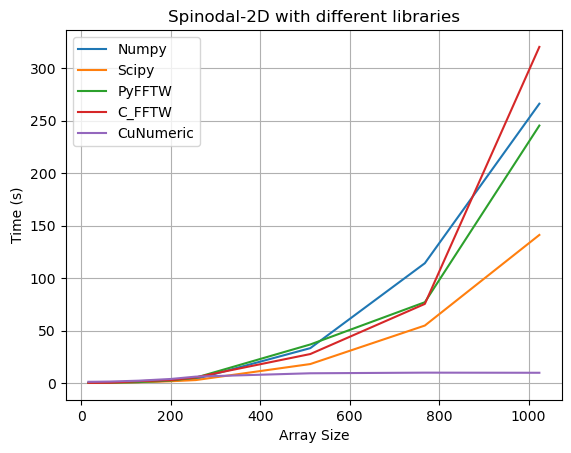

In [20]:
labels = ["Numpy", "Scipy", "PyFFTW", "C_FFTW", "CuNumeric"]
times = [np_times, sp_times, pyfftw_times, c_fftw_time, cun_times]
title = "Spinodal-2D with different libraries"
plot_graph(times, labels, arr_sizes, title)

In [22]:
for time_ in times:
    print(time_)

[0.07390686000000812, 0.09927392499999144, 0.22433703000000094, 0.8466381080000076, 2.154736119000006, 3.792098711999998, 33.207466047, 114.11872310400003, 266.09879910200004]
[0.06757019399998399, 0.0951143109999748, 0.19708781200000658, 0.6872293239999863, 1.6679527200000166, 2.781660494999983, 18.056521691, 54.72269188200005, 141.07093196699998]
[0.17889593699999295, 0.20097624599998198, 0.3275572629999033, 0.9031672959999923, 2.3395121009999684, 5.100217395999948, 36.716889917, 76.94217485299998, 245.27876787899993]
[0.078, 0.106, 0.272, 1.722, 2.727, 5.383, 27.598, 75.353, 320.211]
[1.146749747000058, 1.1873842559998593, 1.3729098459998568, 2.1994362959999307, 3.834367648999887, 6.073562412000001, 9.256802203000007, 9.853434339999922, 9.736022443000138]
